In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
x = np.linspace(0,50,501)

In [ ]:
# x

In [ ]:
y = np.sin(x)

In [ ]:
# y

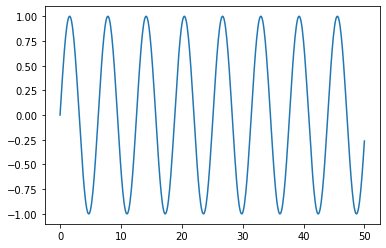

In [ ]:
plt.plot(x,y)

In [ ]:
df = pd.DataFrame(data = y, index = x , columns = ['Sine'])

In [ ]:
# df

In [ ]:
len(df)

501

In [ ]:
test_percent = 0.1

In [ ]:
len(df)*test_percent

50.1

In [ ]:
test_point = np.round(len(df)*test_percent)

In [ ]:
test_point

50.0

In [ ]:
test_index = int(len(df)-test_point)

In [ ]:
test_index

451

In [ ]:
train = df.iloc[:test_index]

In [ ]:
test = df.iloc[test_index:]

In [ ]:
# train

In [ ]:
# test

In [ ]:
  from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler()

In [ ]:
scaled_train = scaler.transform(train)

In [ ]:
scaled_test = scaler.transform(test)

In [ ]:
 from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of the outp

In [ ]:
length = 50
batch_size = 1

In [ ]:
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length,batch_size = batch_size)

In [ ]:
len(scaled_train)

451

In [ ]:
len(generator)

401

In [ ]:
X,y = generator[0]

In [ ]:
# X

In [ ]:
y

array([[0.02053313]])

In [ ]:
# scaled_train

In [ ]:
 from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [ ]:
n_features = 1

In [ ]:
model = Sequential()

model.add(SimpleRNN(50,input_shape = (length,n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss= 'mse')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


401/401 [==============================] - 3s 5ms/step - loss: 0.0028
Epoch 2/5
401/401 [==============================] - 2s 5ms/step - loss: 5.0743e-04
Epoch 3/5
401/401 [==============================] - 2s 5ms/step - loss: 4.6183e-05
Epoch 4/5
401/401 [==============================] - 2s 5ms/step - loss: 5.4073e-04
Epoch 5/5
401/401 [==============================] - 2s 5ms/step - loss: 7.5310e-05


In [ ]:
losses = pd.DataFrame(model.history.history)

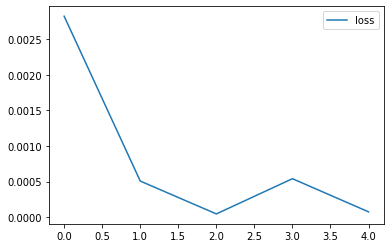

In [ ]:
losses.plot()

In [ ]:
first_eval_batch = scaled_train[-length:]

In [ ]:
first_eval_batch =  first_eval_batch.reshape((1,length,n_features))

In [ ]:
model.predict(first_eval_batch)

array([[0.9513633]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.94955134])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))



In [ ]:
# predicted_value = [[[99]]]
# np.append(current_batch[:,1:,:],[[[99]]],axis = 1)

# np.append(current_batch[:,1:,:],predicted_value,axis = 1)

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [ ]:
# test_predictions

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test

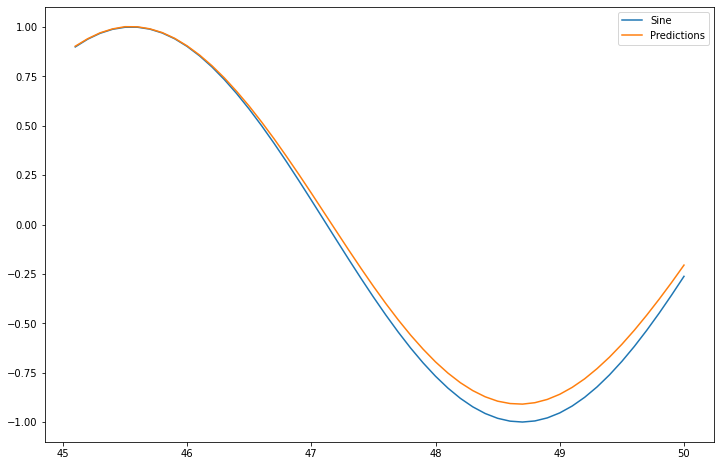

In [ ]:
test.plot(figsize = (12,8))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [ ]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length , batch_size = 1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length = length,batch_size = 1)

In [ ]:
model = Sequential()

model.add(LSTM(50,input_shape= (length,n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit_generator(generator,epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


402/402 [==============================] - 7s 13ms/step - loss: 0.0132 - val_loss: 1.5594e-04
Epoch 2/20
402/402 [==============================] - 5s 12ms/step - loss: 9.4852e-05 - val_loss: 7.0861e-05
Epoch 3/20
402/402 [==============================] - 5s 12ms/step - loss: 1.9993e-04 - val_loss: 9.9971e-06
Epoch 4/20
402/402 [==============================] - 5s 12ms/step - loss: 2.8115e-04 - val_loss: 5.2565e-05
Epoch 5/20
402/402 [==============================] - 5s 12ms/step - loss: 8.0241e-05 - val_loss: 4.8550e-05


In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


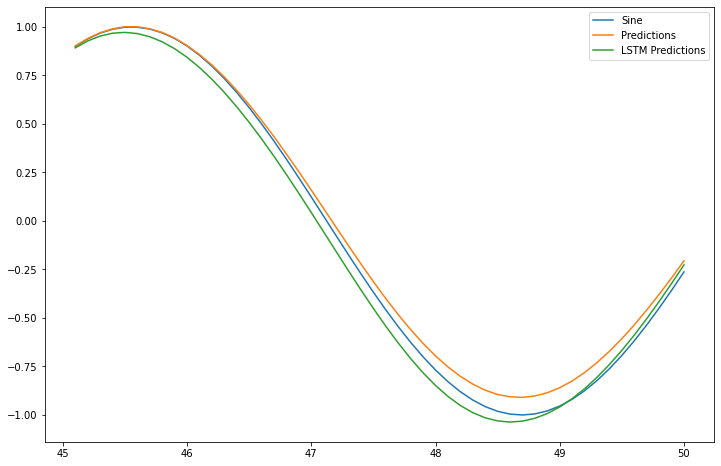

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

test['LSTM Predictions'] = true_predictions

test.plot(figsize = (12,8))

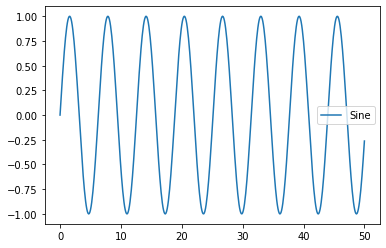

In [ ]:
df.plot()

In [ ]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [ ]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length, batch_size = 1)

In [ ]:
model = Sequential()

model.add(LSTM(50,input_shape= (length,n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model.fit_generator(generator,epochs = 6)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


452/452 [==============================] - 7s 12ms/step - loss: 0.0083
Epoch 2/6
452/452 [==============================] - 6s 12ms/step - loss: 1.2699e-04
Epoch 3/6
452/452 [==============================] - 5s 12ms/step - loss: 3.2514e-04
Epoch 4/6
452/452 [==============================] - 6s 12ms/step - loss: 7.2632e-05
Epoch 5/6
452/452 [==============================] - 6s 12ms/step - loss: 1.2815e-04
Epoch 6/6
452/452 [==============================] - 5s 12ms/step - loss: 1.7859e-04


In [ ]:
forecast = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):

  current_pred = model.predict(current_batch)[0]

  forecast.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [ ]:
25*0.1

2.5

In [ ]:
forecast_index = np.arange(50.1,52.6,step= 0.1)

In [ ]:
len(forecast_index)

25

In [ ]:
len(forecast)

25

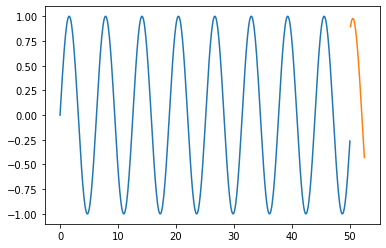

In [ ]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)